In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
# Load verification trajectory
nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = 'engine_deck_stca.csv'
pyna_settings.output_directory_name = 'DLR'
pyna_settings.output_file_name = 'stca_no_cutback.sql'

pyna_settings.TS_to = 1.0
pyna_settings.TS_vnrs = 1.0

# pyna_settings.TS_cutback = 0.566666667
# pyna_settings.z_cutback = 25
pyna_settings.TS_cutback = 1.0
pyna_settings.z_cutback = 500

pyna_settings.max_iter = 100

pyna_settings.PKROT = False
pyna_settings.save_results = True

py = pyna(settings=pyna_settings)
py.ac.k_rot = 1.27
py.ac.z_max = 2700

py.compute_trajectory(objective='t_end', engine_mode='noise')

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- flapsdown - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca/output/DLR/stca_no_cutback.sql, is being overwritten.
/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 5.840621 seconds.
Total jacobian shape: (323, 230) 


Jacobian shape: (323, 230)  ( 2.86% nonzero)
FWD solves: 11   REV solves: 0
Total colors vs. total size: 11 vs 230  (95.2% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 5.840621 sec.
Time to compute coloring: 0.204162 sec.


Optimization Problem -- Optimization using pyOpt_sparse
    Objective Function: _objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                   10.4989
       User Objective Time :       1.5949
       User Sensitivity Time :     7.9769
       Interface Time :            0.8378
       Opt Solver Time:            0.0893
    Calls to Objective Function :      28
    Calls to Sens Function :           24


   Objectives
     

True

In [14]:
path = 'trajectory_stca_no_cutback.csv'
eng = 'engine_stca_no_cutback.csv'
py.save_time_series(py.problem, py.settings, py.ac, path, eng)

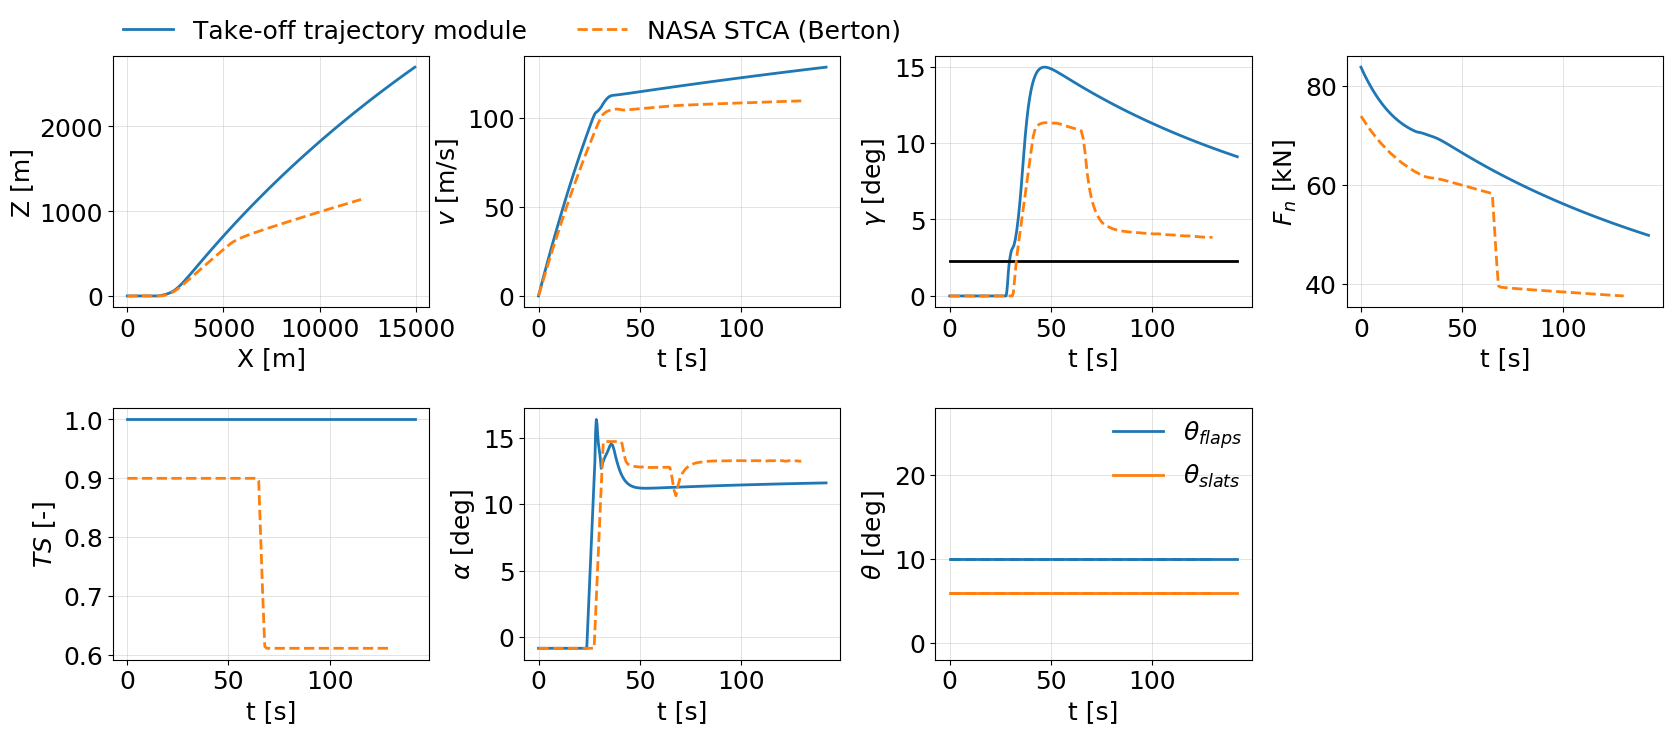

In [12]:
py.plot_trajectory(py.problem, nasa_std)

In [13]:
py.problem.get_val('trajectory.x')[-1]

14944.776924246455